In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error

In [3]:
# 데이터 가져오기

In [46]:
df = pd.read_csv('./Data/최종+재무제표.csv', index_col=0)
df2 = pd.read_csv('./Data/테슬라 총합 재무제표.csv', index_col=0)

In [47]:
df.head(3)

,date,tesla,tesla_거래량,tesla_volatility,elec_fee,oli_price,oli_price_volatility,carbon_credits,carbon_credits_volatility,EVE종가,...,매출원가,매출총이익,영업이익,순이익,자산총계,매출총이익률,영업이익률,주당순이익EPS(달러),주가수익배수PER(배),총자산이익률ROA(%)
0,2015-03-31,37.75,25130.0,-0.94,6.83,47.60,-2.22,6.92,0.58,20.09,...,2531.000000,987.0,-245.000000,-398.000000,6120.000000,28.055713,-6.964184,-0.640000,-59.590000,-7.100000
1,2015-04-01,37.52,18970.0,-0.61,6.61,50.09,5.23,7.14,3.18,21.49,...,2533.936508,987.0,-247.253968,-399.952381,6125.523810,28.033465,-7.019530,-0.643016,-59.677778,-7.125397
2,2015-04-02,38.20,25050.0,1.81,6.61,49.14,-1.90,7.15,0.14,21.66,...,2536.873016,987.0,-249.507937,-401.904762,6131.047619,28.011217,-7.074876,-0.646032,-59.765556,-7.150794


In [48]:
# linear모델의 경우 2019년 이후 데이터로 모델생성

In [49]:
df_2019 = df.iloc[1027:]

In [50]:
df_2019.reset_index(drop=True, inplace=True)

In [51]:
# 다음날 주가 예측

In [52]:
y = df_2019.tesla[5:]
x = df_2019.drop(['tesla', 'tesla_volatility', 'date'], axis=1)[:-5]

In [53]:
x_train = x[:640]
x_test = x[640:]
y_train = y[:640]
y_test = y[640:]

In [55]:
lr = LinearRegression()
rid = Ridge()
las = Lasso()

models = [lr, rid, las]

for model in models:
    
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    
    print(model.__class__.__name__)
    print(r2_score(y_test, preds))
    print(np.sqrt(mean_squared_error(y_test, preds)))

LinearRegression
-22.52584265180105
698.4664139128305
Ridge
-1.0894956207405815
208.1582683292642
Lasso
-2.8887736990022113
283.9744513235668


C:\Users\bitcamp\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.31503e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\bitcamp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.745e+05, tolerance: 4.708e+03
  model = cd_fast.enet_coordinate_descent(


In [61]:
# scalering 후 머신러닝

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
scaler = StandardScaler()

In [64]:
scaler.fit(x_train)

StandardScaler()

In [65]:
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [66]:
lr = LinearRegression()
rid = Ridge()
las = Lasso()

models = [lr, rid, las]

for model in models:
    
    model.fit(x_train_scaled, y_train)
    preds = model.predict(x_test_scaled)
    
    print(model.__class__.__name__)
    print(r2_score(y_test, preds))
    print(np.sqrt(mean_squared_error(y_test, preds)))

LinearRegression
-0.47166411354387194
174.69371622123865
Ridge
-0.0477880094107912
147.40412794651408
Lasso
-0.760884219866647
191.09016458112555


In [67]:
# 주가 변동폭 예측

In [68]:
df.head(3)

,date,tesla,tesla_거래량,tesla_volatility,elec_fee,oli_price,oli_price_volatility,carbon_credits,carbon_credits_volatility,EVE종가,...,매출원가,매출총이익,영업이익,순이익,자산총계,매출총이익률,영업이익률,주당순이익EPS(달러),주가수익배수PER(배),총자산이익률ROA(%)
0,2015-03-31,37.75,25130.0,-0.94,6.83,47.60,-2.22,6.92,0.58,20.09,...,2531.000000,987.0,-245.000000,-398.000000,6120.000000,28.055713,-6.964184,-0.640000,-59.590000,-7.100000
1,2015-04-01,37.52,18970.0,-0.61,6.61,50.09,5.23,7.14,3.18,21.49,...,2533.936508,987.0,-247.253968,-399.952381,6125.523810,28.033465,-7.019530,-0.643016,-59.677778,-7.125397
2,2015-04-02,38.20,25050.0,1.81,6.61,49.14,-1.90,7.15,0.14,21.66,...,2536.873016,987.0,-249.507937,-401.904762,6131.047619,28.011217,-7.074876,-0.646032,-59.765556,-7.150794


In [73]:
y = df_2019.tesla_volatility[5:]
x = df_2019.drop(['tesla', 'tesla_volatility', 'updown', 'date'], axis=1)[:-5]

In [74]:
x_train = x[:640]
x_test = x[640:]
y_train = y[:640]
y_test = y[640:]

In [75]:
lr = LinearRegression()
rid = Ridge()
las = Lasso()

models = [lr, rid, las]

for model in models:
    
    model.fit(x_train_scaled, y_train)
    preds = model.predict(x_test_scaled)
    
    print(model.__class__.__name__)
    print(r2_score(y_test, preds))
    print(np.sqrt(mean_squared_error(y_test, preds)))

LinearRegression
-15.8013403374242
15.465099029257791
Ridge
-10.300032921103359
12.682959191369761
Lasso
-0.004064358271858026
3.780606844018621


In [76]:
# 전처리

In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
scaler = StandardScaler()

In [79]:
scaler.fit(x_train)

StandardScaler()

In [80]:
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [81]:
lr = LinearRegression()
rid = Ridge()
las = Lasso()

models = [lr, rid, las]

for model in models:
    
    model.fit(x_train_scaled, y_train)
    preds = model.predict(x_test_scaled)
    
    print(model.__class__.__name__)
    print(r2_score(y_test, preds))
    print(np.sqrt(mean_squared_error(y_test, preds)))

LinearRegression
-1.755714796873117e+23
1580912106841.6858
Ridge
-10.394530618360305
12.73588006345432
Lasso
-0.004064358271858026
3.780606844018621


In [82]:
# classification을통한 주가 상승/하락 예측

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, f1_score
from sklearn import svm
from lightgbm import LGBMClassifier
import xgboost as xgb

In [85]:
df = pd.read_csv('Data/최종+재무제표.csv', index_col=0)

In [86]:
df.head(3)

,date,tesla,tesla_거래량,tesla_volatility,elec_fee,oli_price,oli_price_volatility,carbon_credits,carbon_credits_volatility,EVE종가,...,매출원가,매출총이익,영업이익,순이익,자산총계,매출총이익률,영업이익률,주당순이익EPS(달러),주가수익배수PER(배),총자산이익률ROA(%)
0,2015-03-31,37.75,25130.0,-0.94,6.83,47.60,-2.22,6.92,0.58,20.09,...,2531.000000,987.0,-245.000000,-398.000000,6120.000000,28.055713,-6.964184,-0.640000,-59.590000,-7.100000
1,2015-04-01,37.52,18970.0,-0.61,6.61,50.09,5.23,7.14,3.18,21.49,...,2533.936508,987.0,-247.253968,-399.952381,6125.523810,28.033465,-7.019530,-0.643016,-59.677778,-7.125397
2,2015-04-02,38.20,25050.0,1.81,6.61,49.14,-1.90,7.15,0.14,21.66,...,2536.873016,987.0,-249.507937,-401.904762,6131.047619,28.011217,-7.074876,-0.646032,-59.765556,-7.150794


In [87]:
y = df.updown[5:]
x = df.drop(['date', 'updown'], axis=1)[:-5]
x = x.loc[:, ['tesla', 'tesla_거래량', 'oli_price', 'EVE거래량', 'alu_change'
]]

In [88]:
x_train = x[:1444]
x_test = x[1444:]
y_train = y[:1444]
y_test = y[1444:]

In [89]:
lg = LogisticRegression()
rfc = RandomForestClassifier()
svc = svm.SVC()
lgbm = LGBMClassifier()
gbs = GradientBoostingClassifier()
xgbs = xgb.XGBClassifier()

models = [lg, rfc, svc, lgbm, gbs, xgbs]

for model in models:
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    print(model.__class__.__name__)
    print('accuracy_score :', accuracy_score(y_test, preds))
    print('f1_score :', f1_score(y_test, preds))
    #print('classification_report :', classification_report(y_test, preds)) 

LogisticRegression
accuracy_score : 0.5363128491620112
f1_score : 0.6981818181818182
RandomForestClassifier
accuracy_score : 0.5418994413407822
f1_score : 0.5751295336787564
SVC
accuracy_score : 0.5363128491620112
f1_score : 0.6981818181818182
LGBMClassifier
accuracy_score : 0.6201117318435754
f1_score : 0.5952380952380953
GradientBoostingClassifier
accuracy_score : 0.5335195530726257
f1_score : 0.4954682779456193
[19:38:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier
accuracy_score : 0.5754189944134078
f1_score : 0.5824175824175825


C:\Users\bitcamp\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [118]:
# 스케일링 후 예측

In [90]:
from sklearn.preprocessing import StandardScaler

In [91]:
scaler = StandardScaler()

In [92]:
scaler.fit(x_train)

StandardScaler()

In [93]:
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [94]:
for model in models:
    model.fit(x_train_scaled, y_train)
    preds = model.predict(x_test_scaled)
    print(model.__class__.__name__)
    print('accuracy_score :', accuracy_score(y_test, preds))
    print('roc_auc_score :', roc_auc_score(y_test, preds))

LogisticRegression
accuracy_score : 0.5363128491620112
roc_auc_score : 0.5
RandomForestClassifier
accuracy_score : 0.5083798882681564
roc_auc_score : 0.5310617469879518
SVC
accuracy_score : 0.5418994413407822
roc_auc_score : 0.5072477409638554
LGBMClassifier
accuracy_score : 0.5614525139664804
roc_auc_score : 0.5727911646586346
GradientBoostingClassifier
accuracy_score : 0.5307262569832403
roc_auc_score : 0.5392507530120482
[19:39:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier
accuracy_score : 0.5754189944134078
roc_auc_score : 0.5772464859437751


C:\Users\bitcamp\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [58]:
# GridSearch를 사용하여 최적의 값 검색

In [526]:
from sklearn.model_selection import GridSearchCV, KFold

In [527]:
param_grid={
    'max_depth':[1,3,5,6,8,10],
    'min_data_in_leaf': [10,15,20,25,30],
    'n_estimators':[100, 200, 300, 400, 500]
}
cv=KFold()
gcv=GridSearchCV(lgbm, param_grid=param_grid, cv=cv, scoring='accuracy', n_jobs=4)
gcv.fit(x_train, y_train)
print('final params', gcv.best_params_)   # 최적의 파라미터 값 출력
print('best score', gcv.best_score_) 

[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
final params {'max_depth': 6, 'min_data_in_leaf': 15, 'n_estimators': 200}
best score 0.5179810649750095


In [528]:
em = gcv.best_estimator_

In [529]:
em.fit(x_train, y_train)

LGBMClassifier(max_depth=6, min_data_in_leaf=15, n_estimators=200)

In [530]:
em.score(x_test, y_test)

0.5251396648044693

In [95]:
import matplotlib.font_manager as fm

In [96]:
plt.rcParams['font.family'] = 'Malgun Gothic'

In [97]:
# 피쳐 중요도 구하기

In [98]:
from lightgbm import plot_importance

In [99]:
sorted_idx = lgbm.feature_importances_.argsort()

In [100]:
x.iloc[:, sorted_idx].columns

Index(['tesla', 'oli_price', 'alu_change', 'EVE거래량', 'tesla_거래량'], dtype='object')

In [101]:
plt.figure(figsize=(7, 20))

<Figure size 504x1440 with 0 Axes>

<Figure size 504x1440 with 0 Axes>

[Text(0, 0, 'tesla'),
 Text(0, 1, 'tesla_거래량'),
 Text(0, 2, 'oli_price'),
 Text(0, 3, 'EVE거래량'),
 Text(0, 4, 'alu_change')]

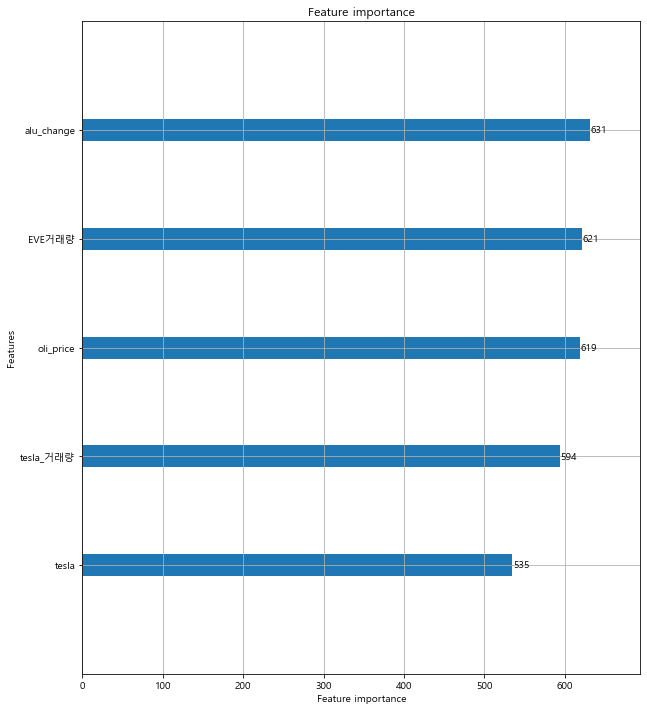

In [73]:
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm, ax=ax).set_yticklabels(x.columns)

In [74]:
# 칼럼 조합별 accuracy

In [75]:
from itertools import combinations

In [97]:
columns_li = list(combinations(x.columns,5))

In [98]:
len(columns_li)

10

In [99]:

models = [lgbm, xgbs]

y = df.updown[5:]
y_train = y[:1444]
y_test = y[1444:]
best_score = 0
over55 = []
for li in columns_li:
    x = df.loc[:, li][:-5]
    x_train = x[:1444]
    x_test = x[1444:]
    for model in models:
        model.fit(x_train, y_train)
        preds = model.predict(x_test)
        accuracy = accuracy_score(y_test, preds)
        #roc_auc = roc_auc_score(y_test, preds)
        print(model.__class__.__name__)
        print('accuracy_score :', accuracy)
        if accuracy >= best_score:
            best_score = accuracy
            best_etstimate = li
            print('=' * 50)
            print('현재 best_score :', best_score)
            print('현재 best_etstimate :', best_etstimate)
            print('=' * 50)
        if accuracy > 0.55:
            over55.append([model, accuracy, li])
#         print('roc_auc_score :', roc_auc)
#         if roc_auc >= best_score:
#             best_score = roc_auc
#             best_etstimate = li

LGBMClassifier
accuracy_score : 0.5363128491620112
현재 best_score : 0.5363128491620112
현재 best_etstimate : ('tesla', 'tesla_거래량', 'oli_price')
[18:49:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier
accuracy_score : 0.5307262569832403


C:\Users\bitcamp\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


LGBMClassifier
accuracy_score : 0.5502793296089385
현재 best_score : 0.5502793296089385
현재 best_etstimate : ('tesla', 'tesla_거래량', 'EVE거래량')
[18:49:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier
accuracy_score : 0.5335195530726257


C:\Users\bitcamp\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


LGBMClassifier
accuracy_score : 0.5502793296089385
현재 best_score : 0.5502793296089385
현재 best_etstimate : ('tesla', 'tesla_거래량', 'alu_change')
[18:49:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier
accuracy_score : 0.5698324022346368
현재 best_score : 0.5698324022346368
현재 best_etstimate : ('tesla', 'tesla_거래량', 'alu_change')


C:\Users\bitcamp\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


LGBMClassifier
accuracy_score : 0.5558659217877095
[18:49:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier
accuracy_score : 0.5363128491620112


C:\Users\bitcamp\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


LGBMClassifier
accuracy_score : 0.5139664804469274
[18:49:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier
accuracy_score : 0.5279329608938548


C:\Users\bitcamp\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


LGBMClassifier
accuracy_score : 0.5251396648044693
[18:49:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier
accuracy_score : 0.5139664804469274


C:\Users\bitcamp\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


LGBMClassifier
accuracy_score : 0.6229050279329609
현재 best_score : 0.6229050279329609
현재 best_etstimate : ('tesla_거래량', 'oli_price', 'EVE거래량')
[18:49:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier
accuracy_score : 0.6089385474860335


C:\Users\bitcamp\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


LGBMClassifier
accuracy_score : 0.5698324022346368
[18:49:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier
accuracy_score : 0.5335195530726257


C:\Users\bitcamp\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


LGBMClassifier
accuracy_score : 0.5754189944134078
[18:49:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier
accuracy_score : 0.5754189944134078


C:\Users\bitcamp\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


LGBMClassifier
accuracy_score : 0.5949720670391061
[18:49:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier
accuracy_score : 0.5670391061452514


C:\Users\bitcamp\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [299]:
best_score

0.6096096096096096

In [300]:
best_etstimate

('자산총계', 'elec_fee', 'REGI_price', 'BYD변동률', 'BYD거래량')

In [102]:
# 시각화

In [103]:
from sklearn.tree import export_graphviz

[Text(0, 0, 'tesla'),
 Text(0, 1, 'tesla_거래량'),
 Text(0, 2, 'oli_price'),
 Text(0, 3, 'EVE거래량'),
 Text(0, 4, 'alu_change')]

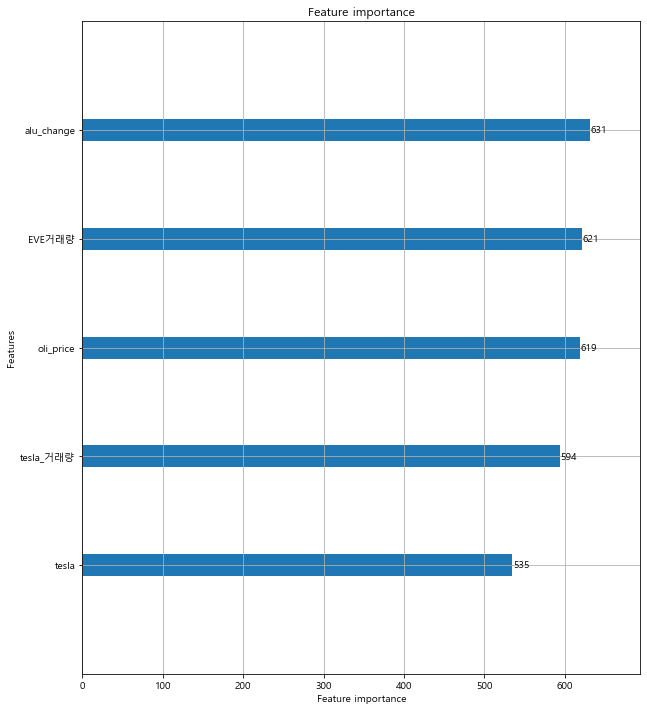

In [104]:
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm, ax=ax).set_yticklabels(x.columns)

In [105]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [106]:
cm = confusion_matrix(y_test, preds)
cm

array([[100,  66],
       [ 86, 106]], dtype=int64)

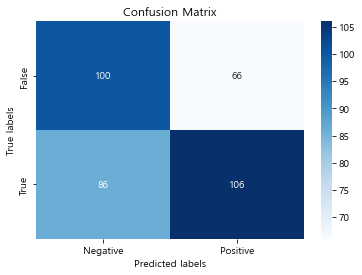

In [107]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='Blues');  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Negative', 'Positive']); ax.yaxis.set_ticklabels(['False', 'True']);